# Setting up your own PyPI repository

In [31]:
!pip install s1290018_learn==1.0.1

Defaulting to user installation because normal site-packages is not writeable
  Attempting uninstall: s1290018_learn
    Found existing installation: s1290018-learn 1.0.0
    Uninstalling s1290018-learn-1.0.0:
      Successfully uninstalled s1290018-learn-1.0.0


In [32]:
!pip show s1290018_learn 

Name: s1290018-learn
Version: 1.0.1
Summary: project is complete.
Home-page: https://github.com/curamubo/s1290018_learn
Author: s1290018
Author-email: 
License: GPLv3
Location: /home/student/s1290018/.local/lib/python3.10/site-packages
Requires: pandas, plotly
Required-by: 


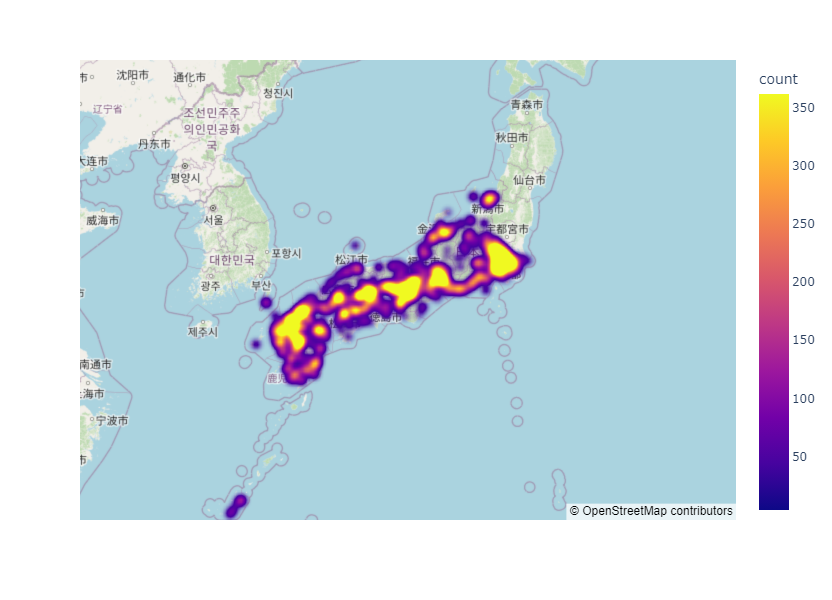

In [10]:
from s1290018_learn.statistics.frequenciesOfItems import FrequenciesOfItems as fi
from s1290018_learn.visualization.heatMapItemsFrequencies import HeatMapItemsFrequencies as hf

transactional_db = 'PM24HeavyPollutionRecordingSensors.csv'
separator = '\t'

result = fi(transactional_db,separator)
result.calculate_frequencies()

items_freq_dictionary = result.get_frequencies()
result1 = hf(transactional_db,separator)
result1.plot_heatmap(items_freq_dictionary)

### c) Knowledge discovery

In [11]:
#import the frequent pattern mining algorithm
from PAMI.frequentPattern.basic import FPGrowth as alg

#inputFile = 'fileName'
inputFile = 'PM24HeavyPollutionRecordingSensors.csv'

#specify the constraints used in the model
minSup=200

#create the object of the mining algorithm 
obj = alg.FPGrowth(inputFile, minSup)

#start the mining process
obj.startMine()

#Print the number of interesting patterns generated
print("Total number of Frequent Patterns:", len(obj.getPatterns()))

#Save the generated patterns in a file
obj.save('frequentPatterns.txt')

# Determine the memory consumed by the mining algorithm
print("Total Memory in RSS", obj.getMemoryRSS())

# Determine the total runtime consumed by the mining algorithm
print("Total ExecutionTime in seconds:", obj.getRuntime())

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total number of Frequent Patterns: 441
Total Memory in RSS 216928256
Total ExecutionTime in seconds: 0.5853314399719238


### d) Visualization

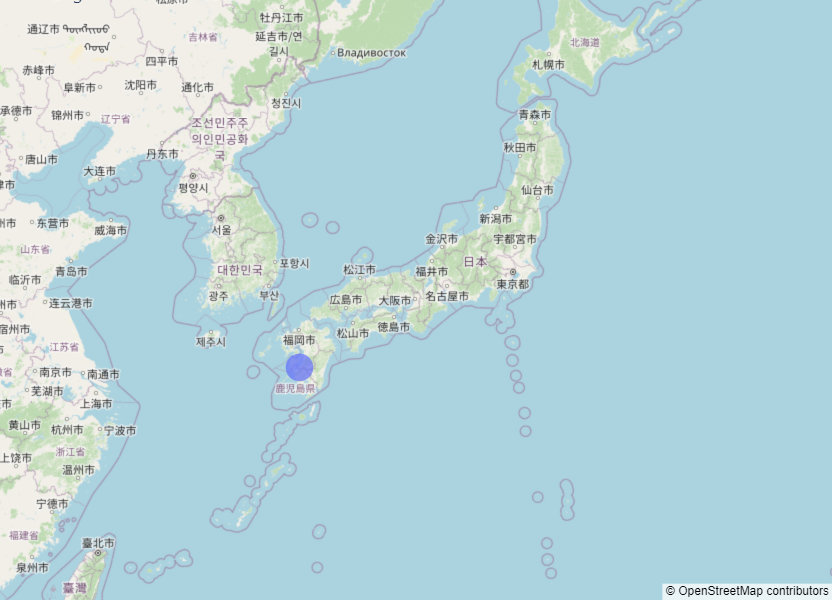

In [14]:
import plotly.express as px
import pandas as pd

# Read the 'frequentPatterns.txt' file and extract point coordinates and occurrence counts
frequent_patterns_file = 'frequentPatterns.txt'
with open(frequent_patterns_file, 'r') as f:
    lines = f.readlines()

data = []
for line in lines:
    points_str, count_str = line.strip().split(':')
    count = int(count_str)
    points = points_str.split('\t')

    for point in points:
        lon, lat = point.replace('POINT(', '').replace(')', '').split()
        data.append((float(lon), float(lat), count))

# Create a DataFrame from the extracted data
df = pd.DataFrame(data, columns=['longitude', 'latitude', 'occurrence_count'])

# Find the longest pattern by sorting the DataFrame by 'occurrence_count' in descending order
longest_pattern = df.sort_values(by='occurrence_count', ascending=False).head(1)

# Create the Open Street Map visualization using Plotly Express
fig = px.scatter_mapbox(
    longest_pattern,
    lat='latitude',
    lon='longitude',
    size='occurrence_count',  # Size of the points based on occurrence count
    hover_name='occurrence_count',  # Display occurrence count on hover
    center={'lat': 34.686567, 'lon': 135.52000},
    zoom=4,
    height=600,
    width=800
)

fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_layout(title_text="Longest Pattern")

# Set the Mapbox token (you need to replace 'your_mapbox_token' with your actual token)
fig.update_layout(
    mapbox=dict(
        accesstoken='your_mapbox_token',
    )
)

# Show the interactive map
fig.show()